In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics

%matplotlib inline

In [2]:
df_1 = pd.read_csv('../data/data_1__.csv')
df_1 = df_1.drop(['index'],axis=1)

In [3]:
df_1['data'] = pd.to_datetime(df_1['data'])
df_1.set_index('data', inplace=True)

In [4]:
df_1.head()

,valor
data,
2016-08-29,9.00
2016-08-30,1.60
2016-08-31,15311.70
2016-09-01,13932.67
2016-09-02,11535.45


In [5]:
month_data = df_1.resample('M').sum()

In [6]:
month_data

,valor
data,
2016-08-31,15322.30
2016-09-30,763561.69
2016-10-31,1060060.55
2016-11-30,972638.69
2016-12-31,1090154.76
2017-01-31,1145117.60
2017-02-28,593055.09
2017-03-31,872141.22
2017-04-30,803613.69


In [7]:
from fbprophet import Prophet
import logging

logging.getLogger().setLevel(logging.ERROR)

ERROR:fbprophet:Importing plotly failed. Interactive plots will not work.


In [8]:
df = month_data.reset_index()
df.columns = ['ds', 'y']
df.head()

,ds,y
0,2016-08-31,15322.30
1,2016-09-30,763561.69
2,2016-10-31,1060060.55
3,2016-11-30,972638.69
4,2016-12-31,1090154.76


In [9]:
prediction_size = 1
train_df = df[:-prediction_size]

In [10]:
m = Prophet(weekly_seasonality=False)
m.add_seasonality(name='monthly', period=30.5, fourier_order=5)
m.fit(train_df)

In [11]:
future = m.make_future_dataframe(periods=1,freq = 'm')

forecast = m.predict(future)

In [12]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,monthly,monthly_lower,monthly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
22,2018-06-30,3.507897e+06,759047.878787,759047.881134,3.507897e+06,3.507897e+06,-2.748849e+06,-2.748849e+06,-2.748849e+06,-1.569643e+06,-1.569643e+06,-1.569643e+06,-1.179206e+06,-1.179206e+06,-1.179206e+06,0.0,0.0,0.0,759047.880000
23,2018-07-31,3.431424e+06,711501.718947,711501.721131,3.431424e+06,3.431424e+06,-2.719922e+06,-2.719922e+06,-2.719922e+06,-2.377056e+06,-2.377056e+06,-2.377056e+06,-3.428661e+05,-3.428661e+05,-3.428661e+05,0.0,0.0,0.0,711501.720000
24,2018-08-31,3.354950e+06,700150.668945,700150.671237,3.354950e+06,3.354950e+06,-2.654800e+06,-2.654800e+06,-2.654800e+06,-2.914678e+06,-2.914678e+06,-2.914678e+06,2.598781e+05,2.598781e+05,2.598781e+05,0.0,0.0,0.0,700150.670000
25,2018-09-30,3.280944e+06,747653.218869,747653.221121,3.280944e+06,3.280944e+06,-2.533291e+06,-2.533291e+06,-2.533291e+06,-2.377056e+06,-2.377056e+06,-2.377056e+06,-1.562347e+05,-1.562347e+05,-1.562347e+05,0.0,0.0,0.0,747653.220000
26,2018-10-31,3.204470e+06,420982.020025,423126.632448,3.203446e+06,3.205591e+06,-2.782464e+06,-2.782464e+06,-2.782464e+06,-2.914678e+06,-2.914678e+06,-2.914678e+06,1.322133e+05,1.322133e+05,1.322133e+05,0.0,0.0,0.0,422006.051103


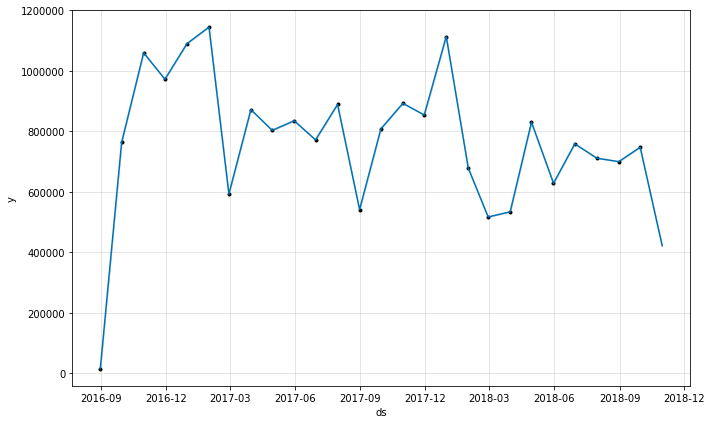

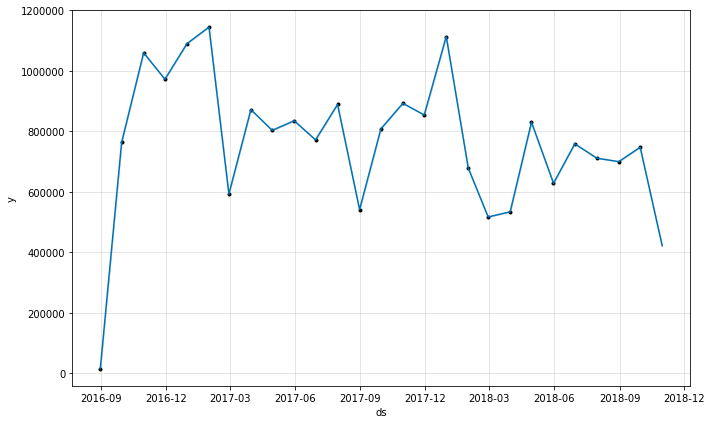

In [13]:
m.plot(forecast)

In [14]:
def make_comparison_dataframe(historical, forecast):
    return forecast.set_index('ds')[['yhat', 'yhat_lower', 'yhat_upper']].join(historical.set_index('ds'))

In [15]:
cmp_df = make_comparison_dataframe(df, forecast)
cmp_df = cmp_df.dropna()

In [16]:
print('MAE:', metrics.mean_absolute_error(cmp_df.y[-prediction_size:],cmp_df.yhat[-prediction_size:]))  
print('MSE:', metrics.mean_squared_error(cmp_df.y[-prediction_size:],cmp_df.yhat[-prediction_size:]))
print('RMSE:', np.sqrt(metrics.mean_squared_error(cmp_df.y[-prediction_size:],cmp_df.yhat[-prediction_size:])))

MAE: 213524.0388971113
MSE: 45592515186.935104
RMSE: 213524.0388971113


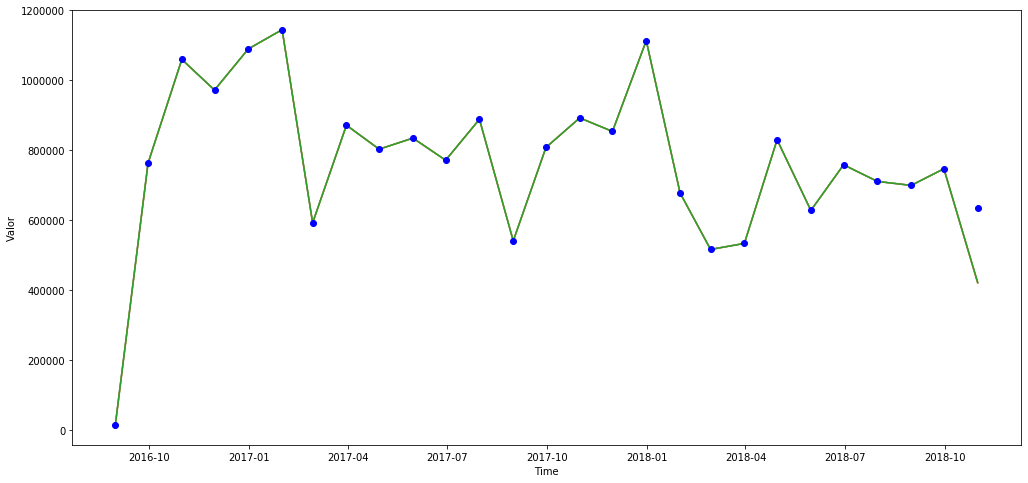

In [17]:
plt.figure(figsize=(17, 8))
plt.plot(cmp_df['yhat'])
plt.plot(cmp_df['yhat_lower'])
plt.plot(cmp_df['yhat_upper'])
plt.plot(cmp_df['y'],'bo')
plt.xlabel('Time')
plt.ylabel('Valor')
plt.grid(False)
plt.show()